In [1]:
import pandas as pd 
pd.pandas.set_option('display.max_columns', None)
import numpy as np
import os

In [2]:
base_path = '../data/owner_data'

files_list = os.listdir(base_path)

In [3]:
import os
import pandas as pd
from pathlib import Path

def get_sheet_names(base_path):
    base_path = Path(base_path)
    
    if not base_path.is_dir():
        raise NotADirectoryError(f"{base_path} is not a valid directory.")

    res = {}

    for file_path in base_path.glob("*.xls*"):
        try:
            xls = pd.ExcelFile(file_path)
            res[file_path.name] = xls.sheet_names
        except Exception as e:
            print(f"Could not read {file_path.name}: {e}")

    return res


In [ ]:
base_path = '../data/owner_data'
available_sheets = get_sheet_names(base_path)

In [ ]:
sheet_availability = pd.DataFrame([available_sheets]).T.reset_index()
sheet_availability.columns = ['file_name', 'sheets']

In [ ]:
sheet_availability = sheet_availability[
    sheet_availability['sheets'].apply(lambda x: len(x) == 2)
    & sheet_availability['sheets'].apply(lambda x: 'apr' in str(x).lower())
    & sheet_availability['sheets'].apply(lambda x: 'dec' in str(x).lower())
]


In [7]:
sheet_availability.loc[:, 'first_sheet'] = sheet_availability['sheets'].apply(lambda x: x[0])
sheet_availability.loc[:, 'second_sheet'] = sheet_availability['sheets'].apply(lambda x: x[1])

In [8]:
sheet_availability.head()

,file_name,sheets,first_sheet,second_sheet
0,Al Barari.xlsx,"[Old, Apr to Dec]",Old,Apr to Dec
1,"Arabian Ranches 1,2,3.xlsx","[Old, Apr to Dec]",Old,Apr to Dec
2,Arjan.xlsx,"[Old, Apr to Dec]",Old,Apr to Dec
3,Bluewater.xlsx,"[Old, Apr to Dec]",Old,Apr to Dec
4,Business Bay-1.xlsx,"[Old, Apr to Dec1]",Old,Apr to Dec1


In [9]:
all_s1_data = []
base_path = '../data/owner_data'
for file, sheet in zip(sheet_availability.loc[:, 'file_name'], sheet_availability.loc[:, 'first_sheet']):
	file_path = os.path.join(base_path, file)
	data = pd.read_excel(file_path, sheet_name=sheet)
	data['file_name'] = file
	all_s1_data.append(data)

In [10]:
len(all_s1_data)

34

In [11]:
import pandas as pd

# Concatenate all dataframes, keeping all columns (union)
final_df = pd.concat(all_s1_data, ignore_index=True, sort=False)

# Check result
print(final_df.shape)
display(final_df.head())


(950243, 31)


,Regis,ProcedureValue,AreaNameEn,Combine,Master Project,Master Project Land,Project,Project Lnd,Building No,BuildingNameEn,Size,UnitNumber,DmSubNo,PropertyTypeEn,LandNumber,ProcedurePartyTypeNameEn,NameEn,Mobile,ProcedureNameEn,CountryNameEn,file_name,Plot Pre Reg No,DmNo,LandSubNumber,IdNumber,UaeIdNumber,PassportExpiryDate,BirthDate,UnifiedNumber,Project Name,PlotNo
0,2024-03-31,5889469.99,Wadi Al Safa 3,Wadi Al Safa 3-2208,Al Barari,Al Barari,CHORISIA 2 VILLAS,CHORISIA 2 VILLAS,BA-R-101,NaN,560.72,NaN,4486.0,Building,2208.0,Seller,ABWAB REAL ESTATE LIMITED CO (L.L.C),NaN,Complete Delayed Sell,NaN,Al Barari.xlsx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-03-31,5889469.99,Wadi Al Safa 3,Wadi Al Safa 3-2208,Al Barari,Al Barari,CHORISIA 2 VILLAS,CHORISIA 2 VILLAS,BA-R-101,NaN,560.72,NaN,4486.0,Building,2208.0,Buyer,CHAKER ZERAIKI,971-56-6038367,Complete Delayed Sell,France,Al Barari.xlsx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-03-31,5889469.99,Wadi Al Safa 3,Wadi Al Safa 3-2208,Al Barari,Al Barari,CHORISIA 2 VILLAS,CHORISIA 2 VILLAS,BA-R-101,NaN,560.72,NaN,4486.0,Building,2208.0,Buyer,CHAKER ZERAIKI,971-56-6038367,Complete Delayed Sell,France,Al Barari.xlsx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-03-29,8196624.70,Wadi Al Safa 3,Wadi Al Safa 3-2218,Al Barari,Al Barari,CHORISIA 2 VILLAS,CHORISIA 2 VILLAS,BA-R-137,NaN,442.00,NaN,4496.0,Building,2218.0,Seller,HAMZA SHABBIR,971-50-9309860,Complete Delayed Sell,NaN,Al Barari.xlsx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-03-29,8196624.70,Wadi Al Safa 3,Wadi Al Safa 3-2218,Al Barari,Al Barari,CHORISIA 2 VILLAS,CHORISIA 2 VILLAS,BA-R-137,NaN,442.00,NaN,4496.0,Building,2218.0,Buyer,ABWAB REAL ESTATE LIMITED CO (L.L.C),NaN,Complete Delayed Sell,Eritrea,Al Barari.xlsx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
missing_data = (final_df.isna().mean() * 100).reset_index()
missing_data.columns = ['Column Name', 'Missing %']
missing_data['Available In'] = np.nan
# missing_data = missing_data.set_index('Column Name')

In [13]:
# Initialize mapping dictionary
column_source_map = {}

# Loop over all columns in final_df
for col in final_df.columns:
	# Find which DataFrames contain this column
	sources = [(i, all_s1_data[i]['file_name'].iloc[0]) for i, df in enumerate(all_s1_data) if col in df.columns]
	column_source_map[col] = sources
	missing_data.loc[missing_data['Column Name'] == col, 'Available In'] = str(sources)

# Example: check mapping for a few columns
for k, v in list(column_source_map.items()):
	print(f"{k}: from DataFrames {v}")


Regis: from DataFrames [(0, 'Al Barari.xlsx'), (1, 'Arabian Ranches 1,2,3.xlsx'), (2, 'Arjan.xlsx'), (3, 'Bluewater.xlsx'), (4, 'Business Bay-1.xlsx'), (5, 'City Walk.xlsx'), (6, 'Damac Hills 1.xlsx'), (7, 'Damac Hills 2.xlsx'), (8, 'Damac Lagoon.xlsx'), (9, 'Downtown.xlsx'), (10, 'Dubai Creek Harbour.xlsx'), (11, 'Dubai Hills.xlsx'), (12, 'Dubai South.xlsx'), (13, 'Emaar BeachFront.xlsx'), (14, 'Emaar South.xlsx'), (15, 'Emirates Living Nov 1.xlsx'), (16, 'Furjan.xlsx'), (17, 'Greens.xlsx'), (18, 'JBR.xlsx'), (19, 'JGE.xlsx'), (20, 'JLT.xlsx'), (21, 'Jumeirah Bay.xlsx'), (22, 'Jumeirah Park.xlsx'), (23, 'JVC.xlsx'), (24, 'JVT.xlsx'), (25, 'Marina Dubai.xlsx'), (26, 'Marsa Dubai 2024.xlsx'), (27, 'Mira - Mira Oasis.xlsx'), (28, 'MJL.xlsx'), (29, 'Motor City New.xlsx'), (30, 'Nad al Shiba.xlsx'), (31, 'Palm Jumeirah.xlsx'), (32, 'Town Square.xlsx'), (33, 'Victory Heights.xlsx')]
ProcedureValue: from DataFrames [(0, 'Al Barari.xlsx'), (1, 'Arabian Ranches 1,2,3.xlsx'), (2, 'Arjan.xlsx'),

C:\Users\mnsnn\AppData\Local\Temp\ipykernel_32392\3256882104.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[(0, 'Al Barari.xlsx'), (1, 'Arabian Ranches 1,2,3.xlsx'), (2, 'Arjan.xlsx'), (3, 'Bluewater.xlsx'), (4, 'Business Bay-1.xlsx'), (5, 'City Walk.xlsx'), (6, 'Damac Hills 1.xlsx'), (7, 'Damac Hills 2.xlsx'), (8, 'Damac Lagoon.xlsx'), (9, 'Downtown.xlsx'), (10, 'Dubai Creek Harbour.xlsx'), (11, 'Dubai Hills.xlsx'), (12, 'Dubai South.xlsx'), (13, 'Emaar BeachFront.xlsx'), (14, 'Emaar South.xlsx'), (15, 'Emirates Living Nov 1.xlsx'), (16, 'Furjan.xlsx'), (17, 'Greens.xlsx'), (18, 'JBR.xlsx'), (19, 'JGE.xlsx'), (20, 'JLT.xlsx'), (21, 'Jumeirah Bay.xlsx'), (22, 'Jumeirah Park.xlsx'), (23, 'JVC.xlsx'), (24, 'JVT.xlsx'), (25, 'Marina Dubai.xlsx'), (26, 'Marsa Dubai 2024.xlsx'), (27, 'Mira - Mira Oasis.xlsx'), (28, 'MJL.xlsx'), (29, 'Motor City New.xlsx'), (30, 'Nad al Shiba.xlsx'), (31, 'Palm Jumeirah.

In [14]:
missing_data['Available In'] = missing_data['Available In'].apply(eval)

In [15]:
missing_data.to_csv('../data/missing_data.csv', index=False)

In [73]:
missing_data

,Column Name,Missing %,Available In
0,Regis,0.000000,"[(0, Al Barari.xlsx), (1, Arabian Ranches 1,2,..."
1,ProcedureValue,0.000000,"[(0, Al Barari.xlsx), (1, Arabian Ranches 1,2,..."
2,AreaNameEn,94.722796,"[(0, Al Barari.xlsx), (6, Damac Hills 1.xlsx),..."
3,Combine,99.617155,"[(0, Al Barari.xlsx)]"
4,Master Project,66.961112,"[(0, Al Barari.xlsx), (5, City Walk.xlsx), (6,..."
5,Master Project Land,84.710982,"[(0, Al Barari.xlsx), (1, Arabian Ranches 1,2,..."
6,Project,14.199109,"[(0, Al Barari.xlsx), (1, Arabian Ranches 1,2,..."
7,Project Lnd,57.687544,"[(0, Al Barari.xlsx), (2, Arjan.xlsx), (3, Blu..."
8,Building No,18.817646,"[(0, Al Barari.xlsx), (1, Arabian Ranches 1,2,..."
9,BuildingNameEn,13.909909,"[(0, Al Barari.xlsx), (1, Arabian Ranches 1,2,..."


In [17]:
missing_data['Available Cnt'] = missing_data['Available In'].apply(lambda x: len(x))

In [18]:
missing_data

,Column Name,Missing %,Available In,Available Cnt
0,Regis,0.000000,"[(0, Al Barari.xlsx), (1, Arabian Ranches 1,2,...",34
1,ProcedureValue,0.000000,"[(0, Al Barari.xlsx), (1, Arabian Ranches 1,2,...",34
2,AreaNameEn,94.354286,"[(0, Al Barari.xlsx), (6, Damac Hills 1.xlsx),...",3
3,Combine,99.590421,"[(0, Al Barari.xlsx)]",1
4,Master Project,64.942967,"[(0, Al Barari.xlsx), (5, City Walk.xlsx), (6,...",13
5,Master Project Land,83.643342,"[(0, Al Barari.xlsx), (1, Arabian Ranches 1,2,...",8
6,Project,14.901662,"[(0, Al Barari.xlsx), (1, Arabian Ranches 1,2,...",27
7,Project Lnd,61.715898,"[(0, Al Barari.xlsx), (2, Arjan.xlsx), (3, Blu...",13
8,Building No,20.131693,"[(0, Al Barari.xlsx), (1, Arabian Ranches 1,2,...",26
9,BuildingNameEn,14.739598,"[(0, Al Barari.xlsx), (1, Arabian Ranches 1,2,...",32


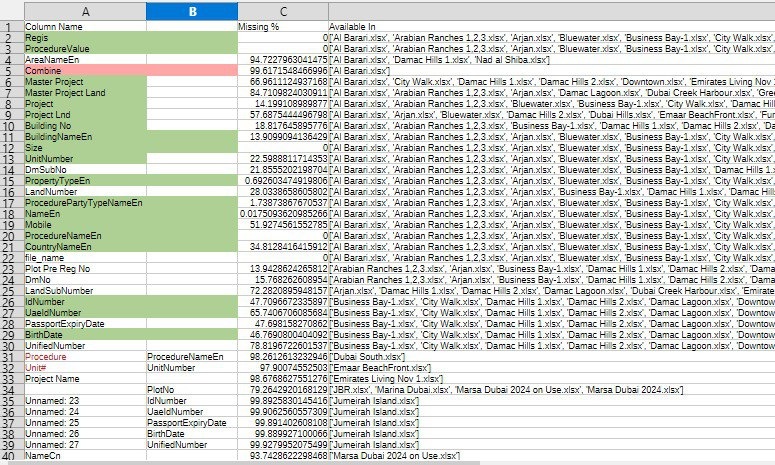

In [ ]:
import pandas as pd
pd.pandas.set_option('display.max_columns', None)


In [21]:
dt.shape

(2746, 28)

In [22]:
import pandas as pd
import numpy as np

# Load the file
file_path = "Jumeirah Island.xlsx - Old.csv"
df = pd.read_excel(r"C:\Users\mnsnn\Documents\SAAS\PropertyFinder\data\owner_data\Jumeirah Island.xlsx", sheet_name='Old')

# Identify rows where 'IdNumber' looks like a Party Type (Buyer/Seller)
# Common values for ProcedurePartyTypeNameEn are 'Buyer', 'Seller', 'Mortgagor', 'Mortgagee', etc.
party_types = ['Buyer', 'Seller', 'Mortgagor', 'Mortgagee', 'Developer', 'Partner']
shifted_rows_mask = df['IdNumber'].isin(party_types)

# Let's inspect a few shifted rows vs normal rows
print("Normal Row (Index 0):")
print(df.iloc[0])
print("\n" + "="*50 + "\n")

print(f"Number of shifted rows found: {shifted_rows_mask.sum()}")

if shifted_rows_mask.sum() > 0:
    first_shifted_index = df[shifted_rows_mask].index[0]
    print(f"Shifted Row (Index {first_shifted_index}):")
    print(df.iloc[first_shifted_index])

    # Let's look at the columns 13 to 27 for this shifted row to see the pattern
    print("\nColumns 13-27 for Shifted Row:")
    print(df.iloc[first_shifted_index, 13:28])
else:
    print("No shifted rows found based on IdNumber containing party types.")

Normal Row (Index 0):
Regis                                     2024-03-28 00:00:00
ProcedureValue                                      5000000.0
Master Project                               Jumeirah Islands
Project Lnd                    TOWNHOUSES AT JUMEIRAH ISLANDS
Plot Pre Reg No                                   JIVCTH4-064
Building No                                       JIVCTH4-064
BuildingNameEn                                            NaN
Size                                                   199.97
UnitNumber                                                NaN
DmNo                                                      393
DmSubNo                                                4204.0
PropertyTypeEn                                           Land
LandNumber                                             4075.0
ProcedurePartyTypeNameEn                               Seller
NameEn                                            XIAOJING SU
Mobile                                         9

In [25]:
# Define the logic to clean the dataframe
def clean_dataframe(df):
    # Identify shifted rows
    party_types = ['Buyer', 'Seller', 'Mortgagor', 'Mortgagee', 'Developer', 'Partner', 'Heir', 'Donator', 'Donee']
    mask = df['IdNumber'].isin(party_types)

    # Create a copy to avoid SettingWithCopy warnings
    df_clean = df.copy()

    # --- Apply mappings for shifted rows ---

    # 1. Map columns 9-12 (Source: 13-16, Shift +4)
    # Target: Size (7) <= Source: PropertyTypeEn (11)
    df_clean.loc[mask, 'Size'] = df.loc[mask, 'PropertyTypeEn']

    # Target: DmNo (9) <= Source: ProcedurePartyTypeNameEn (13)
    df_clean.loc[mask, 'DmNo'] = df.loc[mask, 'ProcedurePartyTypeNameEn']

    # Target: DmSubNo (10) <= Source: NameEn (14)
    df_clean.loc[mask, 'DmSubNo'] = df.loc[mask, 'NameEn']

    # Target: PropertyTypeEn (11) <= Source: Mobile (15)
    df_clean.loc[mask, 'PropertyTypeEn'] = df.loc[mask, 'Mobile']

    # Target: LandNumber (12) <= Source: ProcedureNameEn (16)
    df_clean.loc[mask, 'LandNumber'] = df.loc[mask, 'ProcedureNameEn']

    # 2. Map columns 13-22 (Source: 18-27, Shift +5)
    # Target: ProcedurePartyTypeNameEn (13) <= Source: IdNumber (18)
    df_clean.loc[mask, 'ProcedurePartyTypeNameEn'] = df.loc[mask, 'IdNumber']

    # Target: NameEn (14) <= Source: UaeIdNumber (19)
    df_clean.loc[mask, 'NameEn'] = df.loc[mask, 'UaeIdNumber']

    # Target: Mobile (15) <= Source: PassportExpiryDate (20)
    df_clean.loc[mask, 'Mobile'] = df.loc[mask, 'PassportExpiryDate']

    # Target: ProcedureNameEn (16) <= Source: BirthDate (21)
    df_clean.loc[mask, 'ProcedureNameEn'] = df.loc[mask, 'BirthDate']

    # Target: CountryNameEn (17) <= Source: UnifiedNumber (22)
    df_clean.loc[mask, 'CountryNameEn'] = df.loc[mask, 'UnifiedNumber']

    # Target: IdNumber (18) <= Source: IdNumber.1 (23)
    df_clean.loc[mask, 'IdNumber'] = df.loc[mask, 'IdNumber.1']

    # Target: UaeIdNumber (19) <= Source: UaeIdNumber.1 (24)
    df_clean.loc[mask, 'UaeIdNumber'] = df.loc[mask, 'UaeIdNumber.1']

    # Target: PassportExpiryDate (20) <= Source: Unnamed: 25 (25)
    df_clean.loc[mask, 'PassportExpiryDate'] = df.loc[mask, 'Unnamed: 25']

    # Target: BirthDate (21) <= Source: Unnamed: 26 (26)
    df_clean.loc[mask, 'BirthDate'] = df.loc[mask, 'Unnamed: 26']

    # Target: UnifiedNumber (22) <= Source: Unnamed: 27 (27)
    df_clean.loc[mask, 'UnifiedNumber'] = df.loc[mask, 'Unnamed: 27']


    # 3. Handle Property Identifiers (Cols 4-8) for shifted rows
    # Based on observation: Col 8 contains the likely Building/Plot number (e.g., JI38M532)
    # Current Cols 4, 5 contain 'Jumeirah Islands' (Garbage)
    # Current Cols 6, 7 contain '0' (Garbage)

    # Move Col 8 (UnitNumber) to Plot Pre Reg No (4) and Building No (5)
    df_clean.loc[mask, 'Plot Pre Reg No'] = df.loc[mask, 'UnitNumber']
    df_clean.loc[mask, 'Building No'] = df.loc[mask, 'UnitNumber']

    # Clear garbage in BuildingNameEn (6)
    df_clean.loc[mask, 'BuildingNameEn'] = np.nan
    # UnitNumber (8) is already set correctly (or duplicates 5), let's keep it.

    # 4. Clean up columns that are no longer needed (IdNumber.1 onwards)
    cols_to_drop = ['IdNumber.1', 'UaeIdNumber.1', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27']
    df_clean.drop(columns=cols_to_drop, inplace=True)

    return df_clean

# Apply the cleaning
df_cleaned = clean_dataframe(df)

# Check the results
print("Sample of cleaned shifted rows:")
mask_check = df['IdNumber'].isin(['Buyer', 'Seller', 'Mortgagor', 'Mortgagee', 'Developer'])
print(df_cleaned[mask_check].head())

print("\nNull values after cleaning:")
print(df_cleaned.isnull().sum())

# Save the file
cleaned_file_path = "../data/owner_data/Jumeirah_Island_Old_Cleaned.xlsx"
df_cleaned.to_excel(cleaned_file_path, index=False, sheet_name='Old')
print(f"\nSaved cleaned file to: {cleaned_file_path}")

C:\Users\mnsnn\AppData\Local\Temp\ipykernel_34744\803188996.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0 0 0 ... 144 144 144]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_clean.loc[mask, 'DmSubNo'] = df.loc[mask, 'NameEn']
C:\Users\mnsnn\AppData\Local\Temp\ipykernel_34744\803188996.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[605 605 605 ... 559 559 559]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_clean.loc[mask, 'LandNumber'] = df.loc[mask, 'ProcedureNameEn']


Sample of cleaned shifted rows:
         Regis  ProcedureValue    Master Project           Project Lnd  \
944 2022-12-28      10300000.0  Al Thanyah Fifth  Al Thanyah Fifth-605   
945 2022-12-28      10300000.0  Al Thanyah Fifth  Al Thanyah Fifth-605   
946 2022-12-28      10300000.0  Al Thanyah Fifth  Al Thanyah Fifth-605   
947 2022-12-28       7531300.0  Al Thanyah Fifth  Al Thanyah Fifth-605   
948 2022-12-28       7531300.0  Al Thanyah Fifth  Al Thanyah Fifth-605   

    Plot Pre Reg No Building No BuildingNameEn     Size UnitNumber DmNo  \
944        JI38M532    JI38M532            NaN  1034.65   JI38M532  393   
945        JI38M532    JI38M532            NaN  1034.65   JI38M532  393   
946        JI38M532    JI38M532            NaN  1034.65   JI38M532  393   
947        JI38M532    JI38M532            NaN  1034.65   JI38M532  393   
948        JI38M532    JI38M532            NaN  1034.65   JI38M532  393   

    DmSubNo PropertyTypeEn LandNumber ProcedurePartyTypeNameEn  \
944   

In [22]:
green_items = [
    "Regis",
    "ProcedureValue",
    "Master Project",
    "Master Project Land",
    "Project",
    "Project Lnd",
    "Building No",
    "BuildingNameEn",
    "Size",
    "UnitNumber",
    "DmSubNo",
    "PropertyTypeEn",
    "LandNumber",
    "ProcedurePartyTypeNameEn",
    "NameEn",
    "Mobile",
    "ProcedureNameEn",
    "CountryNameEn",
    "IdNumber",
    "UaeIdNumber",
    "BirthDate"
]

final_valid_data = final_df[green_items]

In [23]:
final_valid_data.to_csv('../data/cleaned_data/uae_realestate_old_cleaned.csv', index=False)

In [27]:
final_valid_data

,Regis,ProcedureValue,Master Project,Master Project Land,Project,Project Lnd,Building No,BuildingNameEn,Size,UnitNumber,DmSubNo,PropertyTypeEn,LandNumber,ProcedurePartyTypeNameEn,NameEn,Mobile,ProcedureNameEn,CountryNameEn,IdNumber,UaeIdNumber,BirthDate
0,2024-03-31,5889469.99,Al Barari,Al Barari,CHORISIA 2 VILLAS,CHORISIA 2 VILLAS,BA-R-101,NaN,560.72,NaN,4486.0,Building,2208.0,Seller,ABWAB REAL ESTATE LIMITED CO (L.L.C),NaN,Complete Delayed Sell,NaN,NaN,NaN,NaN
1,2024-03-31,5889469.99,Al Barari,Al Barari,CHORISIA 2 VILLAS,CHORISIA 2 VILLAS,BA-R-101,NaN,560.72,NaN,4486.0,Building,2208.0,Buyer,CHAKER ZERAIKI,971-56-6038367,Complete Delayed Sell,France,NaN,NaN,NaN
2,2024-03-31,5889469.99,Al Barari,Al Barari,CHORISIA 2 VILLAS,CHORISIA 2 VILLAS,BA-R-101,NaN,560.72,NaN,4486.0,Building,2208.0,Buyer,CHAKER ZERAIKI,971-56-6038367,Complete Delayed Sell,France,NaN,NaN,NaN
3,2024-03-29,8196624.70,Al Barari,Al Barari,CHORISIA 2 VILLAS,CHORISIA 2 VILLAS,BA-R-137,NaN,442.00,NaN,4496.0,Building,2218.0,Seller,HAMZA SHABBIR,971-50-9309860,Complete Delayed Sell,NaN,NaN,NaN,NaN
4,2024-03-29,8196624.70,Al Barari,Al Barari,CHORISIA 2 VILLAS,CHORISIA 2 VILLAS,BA-R-137,NaN,442.00,NaN,4496.0,Building,2218.0,Buyer,ABWAB REAL ESTATE LIMITED CO (L.L.C),NaN,Complete Delayed Sell,Eritrea,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950238,2018-04-17,4200000.00,VICTORY HEIGHTS,NaN,VICTORY HEIGHTS,NaN,MORELLA-34,NaN,664.71,NaN,521.0,Commercial,1167.0,Seller,NOOR BANK P.J.S.C,971-50-6548009,Lease to Own Registration,Saudia,R456921,784193665908021.0,1936-09-17
950239,2018-04-17,4200000.00,VICTORY HEIGHTS,NaN,VICTORY HEIGHTS,NaN,MORELLA-34,NaN,664.71,NaN,521.0,Commercial,1167.0,Buyer,PANKHURI BHANDARI,971-55-9579547,Lease to Own Registration,United Kingdom,519927258,784197738326426.0,1977-04-03
950240,2018-01-18,1610000.00,VICTORY HEIGHTS,NaN,VICTORY HEIGHTS,NaN,Oliva TH 69,NaN,249.86,NaN,220.0,Commercial,1023.0,Seller,BITA RIAHI,971-50-5529527,Lease Finance Registration,France,09AF32703,784197447504271.0,1974-05-21
950241,2018-01-18,1610000.00,VICTORY HEIGHTS,NaN,VICTORY HEIGHTS,NaN,Oliva TH 69,NaN,249.86,NaN,220.0,Commercial,1023.0,Seller,REZA ALAVI,971-50-4595138,Lease Finance Registration,France,15FV00632,784197416296081.0,1974-12-06
